# 금융 시계열 특성을 알아보자

In [25]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 세선 다시 시작

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import os
os.chdir('/content/drive/MyDrive/2024년 고급금융시계열 공유/1. 금융시계열 실습')

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
# 기본 라이브러리 불러오기
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from MyUtil import TaFeatureSet

In [30]:
# 한글 폰트를 위해
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

# 정상성 대 비정상성

# 백색잡음과 랜덤워크

In [31]:
# 백색잡음 1000개를 만들어라
eps=np.random.randn(1000)

In [32]:
# 이를 이용해 랜덤워크를 만들어라 (초기값은 1로 놓아라)
y0=1
yt=np.cumsum(np.append(y0, eps))

Text(0.5, 1.0, '랜덤워크')

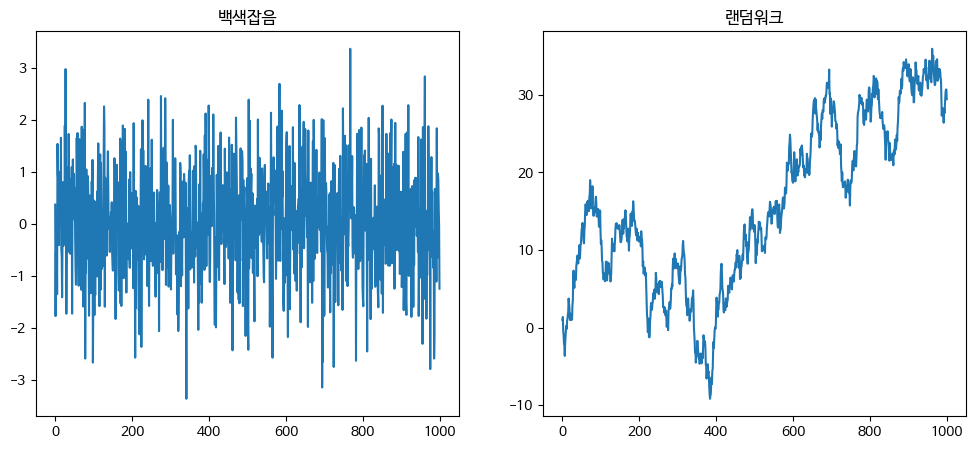

In [33]:
# 백색잡음과 랜덤워크 시계열을 그려라
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(eps)
ax1.set_title('백색잡음')
ax2.plot(yt)
ax2.set_title('랜덤워크')

# 금융시계열(주가수익률)과 랜덤워크(백색잡음)

In [34]:
# Yahoo 사이트에서 주가 데이터를 수집하여 주가, 거래량, 수익률, MACD 지표를
# 관찰하고, 비정상 시계열 (Non-stationary)과 정상 시계열 (Stationary)의
# 차이점을 관찰한다.

In [35]:
# 주가 데이터를 읽어온다
df = pd.read_csv('StockData/069500.csv', index_col=0, parse_dates=True)[::-1]

In [36]:
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2018-12-18,26710.0,26480.0,26520.0,26565.0,6678125.0
2018-12-17,26765.0,26625.0,26670.0,26660.0,9548736.0
2018-12-14,27010.0,26460.0,27000.0,26585.0,12092273.0
2018-12-13,27150.0,26850.0,26875.0,27015.0,15648201.0
2018-12-12,26925.0,26600.0,26635.0,26875.0,12300364.0


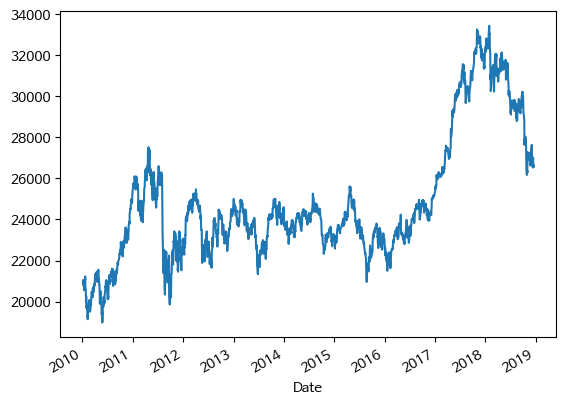

In [37]:
# 종가를 기준으로 그래프를 그린다.
sse = df['Close'].plot()

In [38]:
# 종가를 기준으로 일일 수익률을 계산한다.
sse = np.log(df['Close']) - np.log(df['Close'].shift(1))

<Axes: xlabel='Date'>

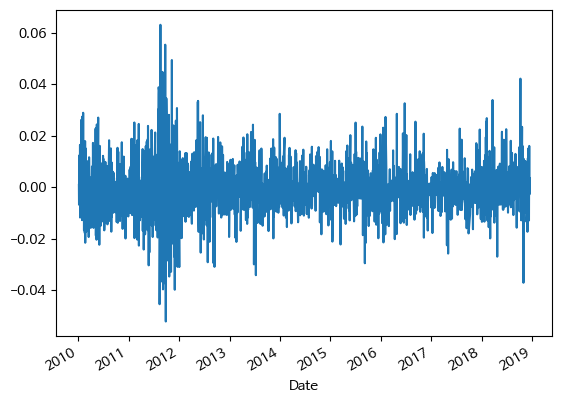

In [39]:
sse.plot()

In [40]:
# 2 표준편차로 상하한선을 설정
ll= sse.mean()-2.*sse.std()
ul=sse.mean()+2.*sse.std()

In [41]:
rw=np.random.normal(loc=np.mean(sse), scale=np.std(sse), size=len(sse))
rw=pd.Series(rw, index=sse.index)

In [42]:
# 랜덤워크(백색잡음)를 그려보자

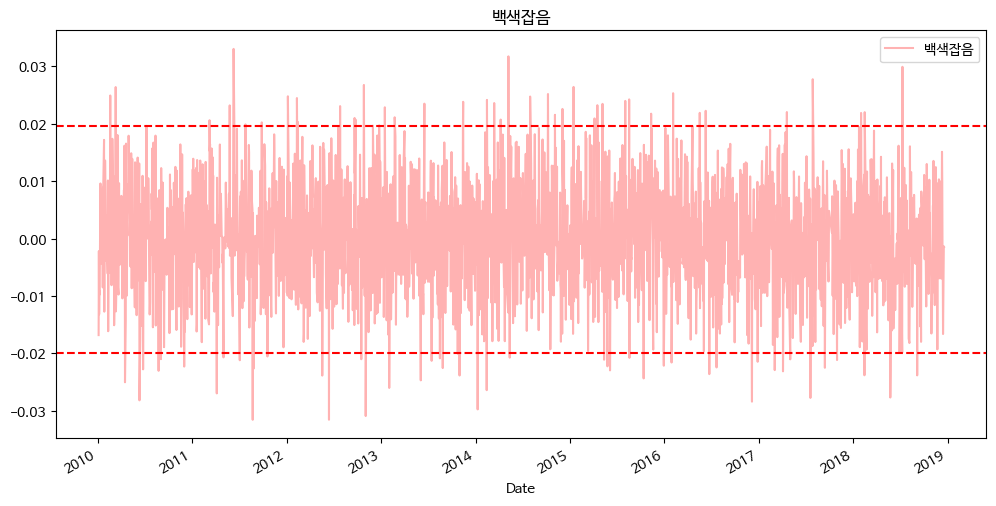

In [43]:
#sse.plot(figsize=(12, 6), alpha=0.5)
rw.plot(figsize=(12, 6), label='백색잡음', c='r', alpha=0.3)
plt.axhline(ll, c='r', ls='--')
plt.axhline(ul, c='r', ls='--')
plt.title("백색잡음")
plt.legend()

# 주식의 수익률을 그려보자

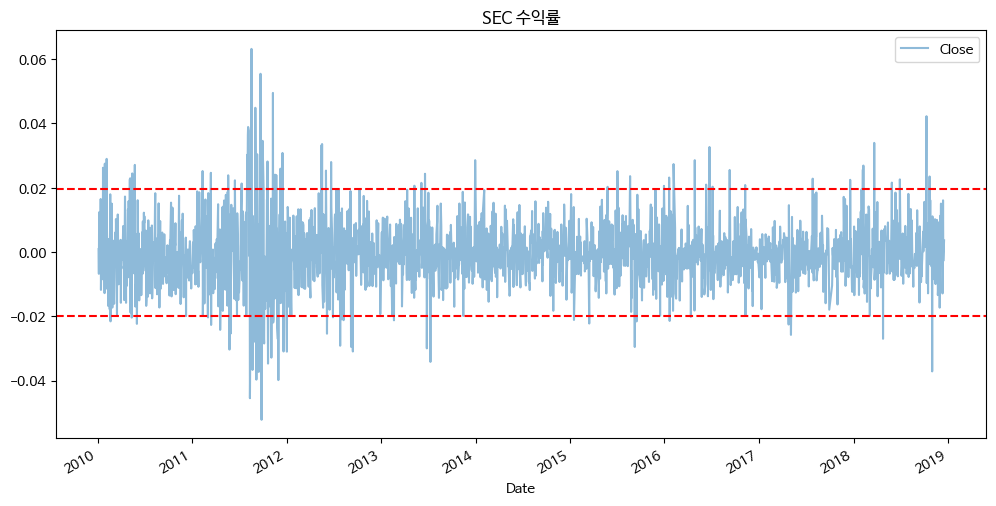

In [44]:
sse.plot(figsize=(12, 6), alpha=0.5)
#rw.plot(label='Random Walk', c='r', alpha=0.3)
plt.axhline(ll, c='r', ls='--')
plt.axhline(ul, c='r', ls='--')
plt.title("SEC 수익률")
plt.legend()

# 주식의 수익률과 랜덤워크를 같이 그려보자

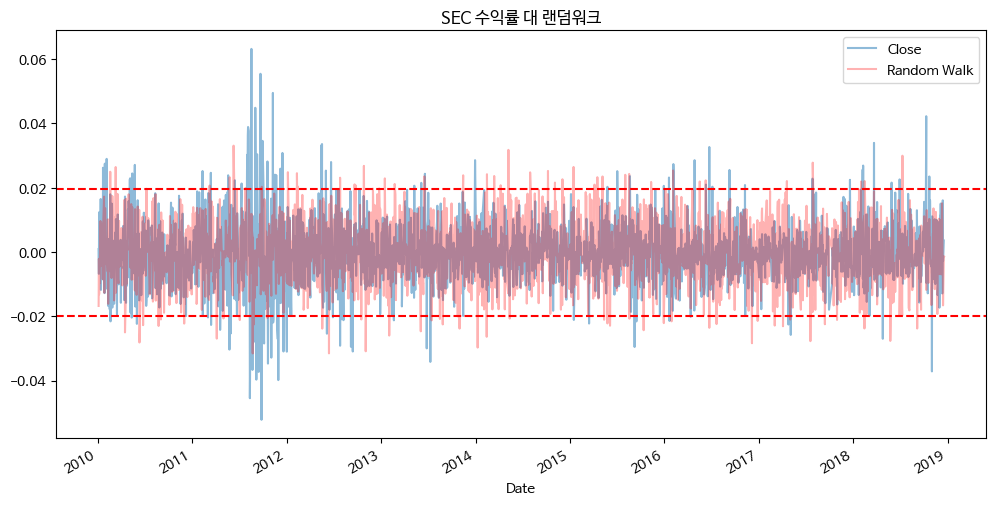

In [45]:
sse.plot(figsize=(12, 6), alpha=0.5)
rw.plot(label='Random Walk', c='r', alpha=0.3)
plt.axhline(ll, c='r', ls='--')
plt.axhline(ul, c='r', ls='--')
plt.title("SEC 수익률 대 랜덤워크")
plt.legend()

# 비정상성과 정상성 시계열의 예

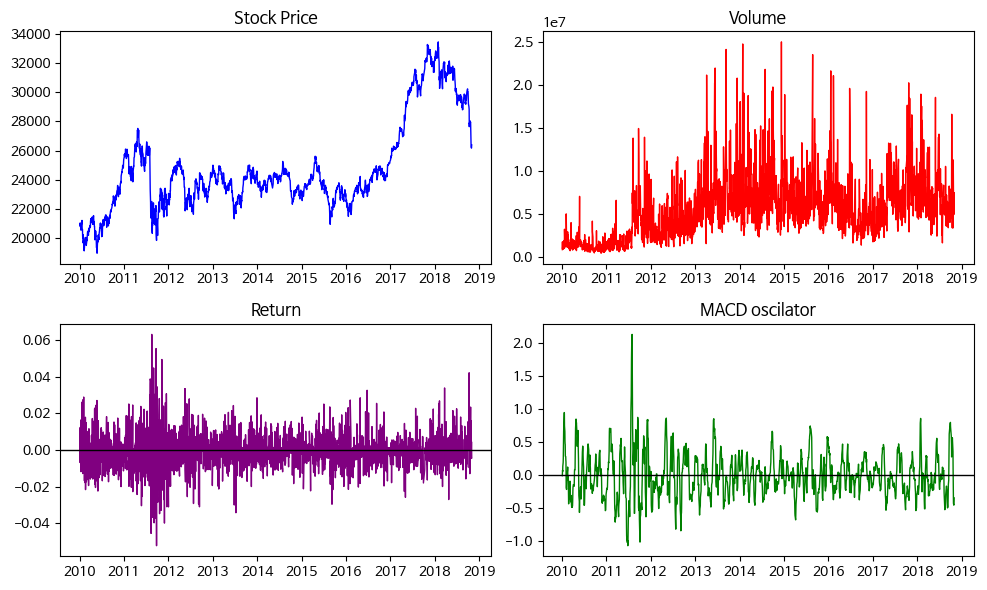

In [46]:
# 종가를 기준으로 일일 수익률을 계산한다.
df['Rtn'] = np.log(df['Close']) - np.log(df['Close'].shift(1))

# MACD 기술적 지표를 측정한다
df['macd'] = TaFeatureSet.MACD(df)
df = df.dropna()

# 주가, 거래량, 수익률, MACD를 그린다
fig = plt.figure(figsize=(10, 6))
p1 = fig.add_subplot(2,2,1)
p2 = fig.add_subplot(2,2,2)
p3 = fig.add_subplot(2,2,3)
p4 = fig.add_subplot(2,2,4)

p1.plot(df['Close'], color='blue', linewidth=1)
p2.plot(df['Volume'], color='red', linewidth=1)
p3.plot(df['Rtn'], color='purple', linewidth=1)
p4.plot(df['macd'], color='green', linewidth=1)
p1.set_title("Stock Price")
p2.set_title("Volume")
p3.set_title("Return")
p4.set_title("MACD oscilator")
p3.axhline(y=0, color='black', linewidth=1)
p4.axhline(y=0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

In [47]:
# df = pd.read_csv("jj.csv")